<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_data(y_hat)_multi_delta_(0_4)_n30_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_0.4'

In [4]:
os.listdir(base_path)

['data_multi_delta_0.4_n20.csv',
 'data_multi_delta_0.4_n30.csv',
 'data_multi_delta_0.4_n60.csv',
 'data_multi_delta_0.4_n120.csv',
 'data_multi_delta_0.4_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_0.4_n30.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,80.631530,54.917402,33.074879,0.100011,178.723823,177.538356,1.185467
1,0.0,1.0,56.438301,47.394046,32.454702,-4.181361,142.105688,145.753433,-3.647746
2,0.0,2.0,91.973891,36.847600,64.523085,-0.956041,202.388535,202.572469,-0.183933
3,0.0,3.0,63.360724,36.747086,80.789033,2.854982,193.751824,191.223442,2.528382
4,0.0,4.0,57.577254,26.248341,59.234300,0.594790,153.654684,152.972200,0.682484
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,77.465914,20.035028,33.008707,-1.238989,139.270659,140.234330,-0.963671
29996,999.0,26.0,62.324377,70.173674,76.471117,-2.024816,216.944352,217.969676,-1.025324
29997,999.0,27.0,63.499684,91.600732,87.131329,-2.958235,249.273510,250.958659,-1.685149
29998,999.0,28.0,74.497091,57.305529,47.995506,2.641472,192.439597,189.151929,3.287668


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,80.631530,54.917402,33.074879,0.100011,178.723823,177.538356,1.185467
1,0.0,1.0,56.438301,47.394046,32.454702,-4.181361,142.105688,145.753433,-3.647746
2,0.0,2.0,91.973891,36.847600,64.523085,-0.956041,202.388535,202.572469,-0.183933
3,0.0,3.0,63.360724,36.747086,80.789033,2.854982,193.751824,191.223442,2.528382
4,0.0,4.0,57.577254,26.248341,59.234300,0.594790,153.654684,152.972200,0.682484
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,77.465914,20.035028,33.008707,-1.238989,139.270659,140.234330,-0.963671
29996,999.0,26.0,62.324377,70.173674,76.471117,-2.024816,216.944352,217.969676,-1.025324
29997,999.0,27.0,63.499684,91.600732,87.131329,-2.958235,249.273510,250.958659,-1.685149
29998,999.0,28.0,74.497091,57.305529,47.995506,2.641472,192.439597,189.151929,3.287668


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    80.631530  54.917402  33.074879  ...  178.723823  177.538356  1.185467
      1.0    56.438301  47.394046  32.454702  ...  142.105688  145.753433 -3.647746
      2.0    91.973891  36.847600  64.523085  ...  202.388535  202.572469 -0.183933
      3.0    63.360724  36.747086  80.789033  ...  193.751824  191.223442  2.528382
      4.0    57.577254  26.248341  59.234300  ...  153.654684  152.972200  0.682484
...                ...        ...        ...  ...         ...         ...       ...
999.0 25.0   77.465914  20.035028  33.008707  ...  139.270659  140.234330 -0.963671
      26.0   62.324377  70.173674  76.471117  ...  216.944352  217.969676 -1.025324
      27.0   63.499684  91.600732  87.131329  ...  249.273510  250.958659 -1.685149
      28.0   74.497091  57.305529  47.995506  ...  192.439597  189.151929  3.287668
      29.0   83.541061  85.035014  97.134119  ...  274.865851  274.111231  0.754620

[30000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    80.631530  54.917402  33.074879  ...  178.723823  177.538356  1.185467
      1.0    56.438301  47.394046  32.454702  ...  142.105688  145.753433 -3.647746
      2.0    91.973891  36.847600  64.523085  ...  202.388535  202.572469 -0.183933
      3.0    63.360724  36.747086  80.789033  ...  193.751824  191.223442  2.528382
      4.0    57.577254  26.248341  59.234300  ...  153.654684  152.972200  0.682484
...                ...        ...        ...  ...         ...         ...       ...
999.0 25.0   77.465914  20.035028  33.008707  ...  139.270659  140.234330 -0.963671
      26.0   62.324377  70.173674  76.471117  ...  216.944352  217.969676 -1.025324
      27.0   63.499684  91.600732  87.131329  ...  249.273510  250.958659 -1.685149
      28.0   74.497091  57.305529  47.995506  ...  192.439597  189.151929  3.287668
      29.0   83.541061  85.035014  97.134119  ...  274.865851  274.111231  0.754620

[30000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,80.631530,54.917402,33.074879,0.100011,178.723823,177.538356,1.185467
1,0.0,1.0,56.438301,47.394046,32.454702,-4.181361,142.105688,145.753433,-3.647746
2,0.0,2.0,91.973891,36.847600,64.523085,-0.956041,202.388535,202.572469,-0.183933
3,0.0,3.0,63.360724,36.747086,80.789033,2.854982,193.751824,191.223442,2.528382
4,0.0,4.0,57.577254,26.248341,59.234300,0.594790,153.654684,152.972200,0.682484
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,77.465914,20.035028,33.008707,-1.238989,139.270659,140.234330,-0.963671
29996,999.0,26.0,62.324377,70.173674,76.471117,-2.024816,216.944352,217.969676,-1.025324
29997,999.0,27.0,63.499684,91.600732,87.131329,-2.958235,249.273510,250.958659,-1.685149
29998,999.0,28.0,74.497091,57.305529,47.995506,2.641472,192.439597,189.151929,3.287668


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    80.631530  54.917402  33.074879  ...  178.723823  177.538356  1.185467
      1.0    56.438301  47.394046  32.454702  ...  142.105688  145.753433 -3.647746
      2.0    91.973891  36.847600  64.523085  ...  202.388535  202.572469 -0.183933
      3.0    63.360724  36.747086  80.789033  ...  193.751824  191.223442  2.528382
      4.0    57.577254  26.248341  59.234300  ...  153.654684  152.972200  0.682484
...                ...        ...        ...  ...         ...         ...       ...
999.0 25.0   77.465914  20.035028  33.008707  ...  139.270659  140.234330 -0.963671
      26.0   62.324377  70.173674  76.471117  ...  216.944352  217.969676 -1.025324
      27.0   63.499684  91.600732  87.131329  ...  249.273510  250.958659 -1.685149
      28.0   74.497091  57.305529  47.995506  ...  192.439597  189.151929  3.287668
      29.0   83.541061  85.035014  97.134119  ...  274.865851  274.111231  0.754620

[30000 rows x 7 columns]

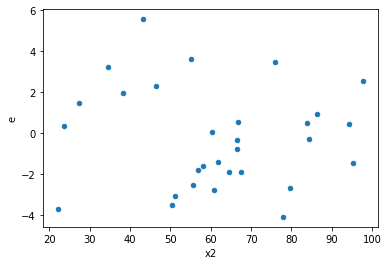

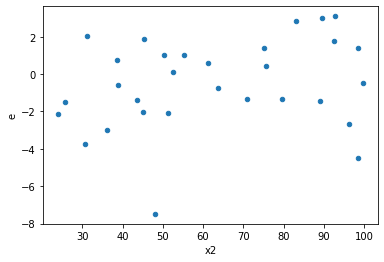

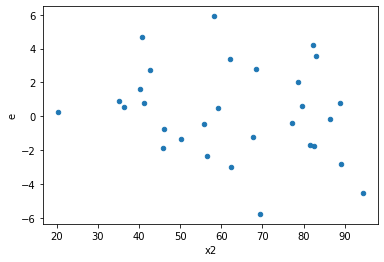

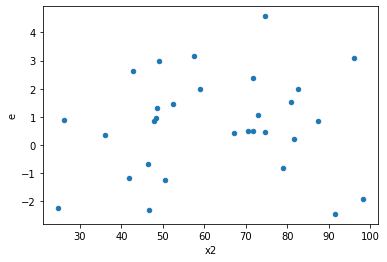

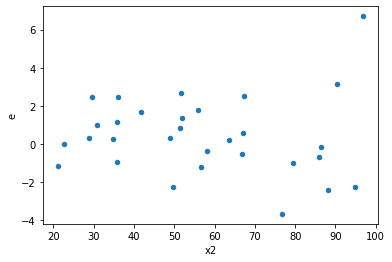

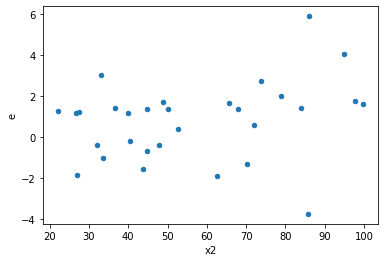

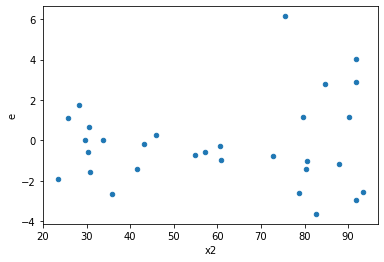

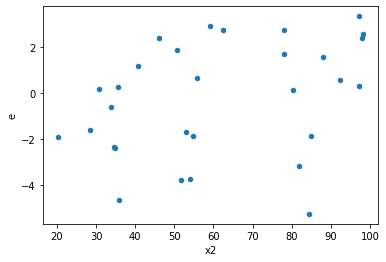

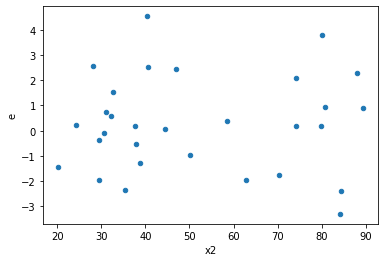

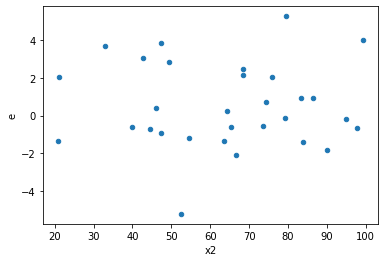

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
2.0,9.0,9.0,31.449293934228155,66.37156826454235,3.494365992692017,7.374618696060261,2.110431108671288,0.28113075675428956,0.8594346216228552,0.14056537837714478,Reject005=1 : Homoscedasticity
5.0,9.0,9.0,15.09303202326117,57.58382938786293,1.67700355814013,6.398203265318103,3.8152592069715046,0.05887931156049486,0.9705603442197526,0.02943965578024743,Reject005=1 : Homoscedasticity
6.0,9.0,9.0,14.16202712105986,49.363728943627365,1.573558569006651,5.484858771514151,3.485640051502251,0.07691815401081015,0.9615409229945949,0.03845907700540507,Reject005=1 : Homoscedasticity
7.0,9.0,9.0,10.679656097958661,36.27899528324524,1.18662845532874,4.030999475916137,3.3970190566510565,0.08285958689161599,0.958570206554192,0.041429793445807994,Reject005=1 : Homoscedasticity
8.0,9.0,9.0,59.05294831018516,74.29795892565247,6.561438701131684,8.255328769516941,1.25815833166179,0.7378521379544531,0.6310739310227734,0.3689260689772266,Reject005=1 : Homoscedasticity
13.0,9.0,9.0,16.028400488964937,46.632647484697515,1.7809333876627709,5.181405276077502,2.909376236063147,0.1274339617656175,0.9362830191171913,0.06371698088280875,Reject005=1 : Homoscedasticity
14.0,9.0,9.0,25.189812583638872,57.57448347429202,2.7988680648487634,6.397164830476892,2.28562571806062,0.2340467169649636,0.8829766415175182,0.1170233584824818,Reject005=1 : Homoscedasticity
15.0,9.0,9.0,14.830330264701423,31.688296215530343,1.6478144738557137,3.520921801725594,2.1367222206071568,0.2734046608213325,0.8632976695893337,0.13670233041066626,Reject005=1 : Homoscedasticity
16.0,9.0,9.0,49.833539565235554,56.455389223314356,5.537059951692839,6.272821024812706,1.1328793763367007,0.8556063742011593,0.5721968128994204,0.42780318710057963,Reject005=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,9.0,9.0,38.66266109424282,35.930369980154495,4.295851232693646,3.992263331128277,0.9293299778970676,0.9148526563726492,Reject005=1 : Homoscedasticity
1.0,9.0,9.0,55.443339152871964,53.28989184103136,6.160371016985774,5.921099093447929,0.9611594946346399,0.9539112124748275,Reject005=1 : Homoscedasticity
2.0,9.0,9.0,31.449293934228155,66.37156826454235,3.494365992692017,7.374618696060261,2.110431108671288,0.28113075675428956,Reject005=1 : Homoscedasticity
3.0,9.0,9.0,24.745919336217028,20.814410636360485,2.749546592913003,2.3127122929289428,0.8411249690730802,0.8008289384537167,Reject005=1 : Homoscedasticity
4.0,9.0,9.0,38.19661879348002,27.089390669005713,4.244068754831114,3.0099322965561903,0.7092091270034022,0.6169860670463255,Reject005=1 : Homoscedasticity
5.0,9.0,9.0,15.09303202326117,57.58382938786293,1.67700355814013,6.398203265318103,3.8152592069715046,0.05887931156049486,Reject005=1 : Homoscedasticity
6.0,9.0,9.0,14.16202712105986,49.363728943627365,1.573558569006651,5.484858771514151,3.485640051502251,0.07691815401081015,Reject005=1 : Homoscedasticity
7.0,9.0,9.0,10.679656097958661,36.27899528324524,1.18662845532874,4.030999475916137,3.3970190566510565,0.08285958689161599,Reject005=1 : Homoscedasticity
8.0,9.0,9.0,59.05294831018516,74.29795892565247,6.561438701131684,8.255328769516941,1.25815833166179,0.7378521379544531,Reject005=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      930
Reject005=0 : Heteroscedasticity     70
Name: Result_test, dtype: int64